# IRONHACK - DATA ANALYSIS FT - JAN22
## ***PROJECT: Data cleaning and manipulation - Shark Attack***
---

Our goal with this data cleaning and manipulation project a few questions from a business perspective, assuming our company has not been established yet.

Therefore, at first, we need to identify on what two or three countries we have the highest shark attack occurrences and, moreover, if they were accidental (unprovoked) or provoked.

As stated above, first of all, we need to identify where would our potential clients be located at, what should lead to the following answers:

    1.  What countries have the most shark attacks?
    2.  What countries and cities have the deadliest shark attacks?

Once we have the answers for that we should be ready to answer the next logical question:

    3.Where should our company install its headquarters at?

After deciding where we should install our headquarters at we'll need to decide on what type of business activity we should aim at. In order for that to be possible, we'll need to answer the following questions:

    4.  What would be our target audience? (Government, customers (male, female, does not matter?), ecc) It depends on what triggered the attack: Predatory or provocative behavior?

    5.  What are shark attacks progression through years?
    6.  What season of the year are shark attacks more prevalent?
    7. Is there any gender relationship between shark attacks? How likely are men and women to be attacked?

Once we have answered the questions above we should be ready to decide:

    8.  What would be our company's business purpose? Should we sell a product (i.e. Shark repelent), provide a service to warn or educate bathers/swimmers

Considering that we'd like to enrich this project, as for our future plans we'd like to deepen our research and check how does shark attacks relate to moon phases? This currently is our work in progress.

## Import Libs:
First things first! We need to import all the libraries we might need during our project.

---

In [175]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
from pandas_profiling import ProfileReport
from datetime import datetime
from bs4 import BeautifulSoup
import dateparser
import requests

## Read CSV and identify encodig.

Once we have duly imported our libs, it's time to open our data file that we'll be working with.

---

In [187]:
shark_data = pd.read_csv("data/attacks.csv", encoding="latin1")
#DataSet documentation: https://www.sharkattackfile.net/
#mp_cols = "New Moon","First Quarter","Full Moon", "Third Quarter"
#
#Work in progress

#for year in tqdm(range(1800,2020)):
    #globals()[f"df{year}"] = pd.read_html(f'https://www.timeanddate.com/moon/phases/?year={year}')[1]

# for year in range(1800,2020):
#     for mp in mp_cols:
#         globals()f'df{year}{[mp]}' = (globals()[f'df{year}{[mp]}']+f'/{year}').str.replace(' ','/')
#         globals()f'df{year}{[mp]}'.apply(lambda y: datetime.strptime(y, '%d/%b/%Y') if isinstance(y,str) and not y.startswith('*/All/times/') else np.nan)


#    pd.to_datetime(moonp[mp])


#df['New Moon'].apply(lambda x: datetime.strptime(x, '%d/%b/%Y') if isinstance(x,str) and not x.startswith('*/All/times/') else np.nan)


## DataSet Preview
### ***Head, info, describe and dtypes***

Now it's time for us to have a first glimpse of our DataFrame so we can find out what kind of data treatment tools we might use.

---

In [177]:
shark_data.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [17]:
shark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [34]:
shark_data.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [37]:
shark_data.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

<AxesSubplot:>

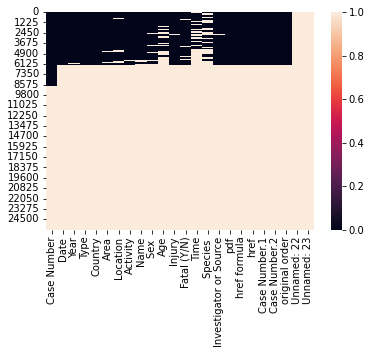

In [7]:
%matplotlib inline

sns.heatmap(shark_data.isnull())
#plt.show()

## Data cleaning and manipulation.

#### ____Check and drop blank lines:____

---

In [188]:
lines_to_drop = shark_data.isnull().sum(axis=1) #crio a máscara que soma a quantidade de dados nulos NAS LINHAS
shark_data[lines_to_drop >= len(shark_data.columns)] #aplico a máscara que verifica as linhas com todas as entradas nulas
shark_data = shark_data.drop(shark_data[lines_to_drop >= len(shark_data.columns)].index) #aplico a máscara no drop e atribuo o resultado à variável para não fazer inplace
shark_data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ____Check and drop blank and unwanted columns:____

---

In [189]:
columns_to_drop = shark_data[:][:].isnull().sum()#crio a máscara que soma a quantidade de dados nulos NAS COLUNAS

#shark_data[columns_to_drop <= (len(shark_data)*.95)] #aplico a máscara que verifica as colunas com pelo menos 95% das entradas nulas
#shark_data = shark_data.drop(shark_data[columns_to_drop <= (len(shark_data)*.95).columns])#aplico a máscara no drop e atribuo o resultado à variável para não fazer inplace
#DROP IRRELEVANT COLUMNS ACCORDING TO THIS PROJECTS PURPOSE/SCOPE
shark_data = shark_data.drop(columns=["Unnamed: 22","Unnamed: 23","Investigator or Source","href","href formula","pdf"])
shark_data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check possibly duplicated and unwanted columns:

---


In [190]:
#shark_data[["Case Number","Case Number.2","Case Number.1"]]
mask = ((shark_data["Case Number"] == shark_data["Case Number.1"]) & (shark_data["Case Number"] == shark_data["Case Number.2"])).value_counts()
#drop irrelevant (to the scope of this project) and almost identical columns
shark_data = shark_data.drop(columns=["Case Number.1","Case Number","Case Number.2"])
shark_data

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,original order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,6301.0
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,6300.0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replace NULL/NaN by 0 so we can better handle data:

---

In [191]:
%matplotlib inline
col_names = shark_data.columns.values.tolist()

for col in col_names:
    shark_data[f"{col}"] = shark_data[f"{col}"].fillna(0)

#### Check replacement result:

In [182]:
shark_data.isna().sum()

Date              0
Year              0
Type              0
Country           0
Area              0
Location          0
Activity          0
Name              0
Sex               0
Age               0
Injury            0
Fatal (Y/N)       0
Time              0
Species           0
original order    0
dtype: int64

### Identify and modify data types, if needed.

---

In [81]:
shark_data.dtypes

Date               object
Year                int32
Type               object
Country            object
Area               object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Fatal (Y/N)        object
Time               object
Species            object
original order    float64
dtype: object

In [192]:
shark_data["Year"] = shark_data["Year"].astype(int)
shark_data

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,original order
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,6303.0
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,0,6302.0
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,0,6301.0
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,0,2 m shark,6300.0
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,0,"Tiger shark, 3m",6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
8699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
8700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
8701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


### Drop lines that have no value for country, area and location

---


In [193]:
shark_data = shark_data[~((shark_data.loc[:,"Country"] == 0) & (shark_data.loc[:,"Location"] == 0) & (shark_data.loc[:,"Area"] == 0))]
shark_data

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,original order
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,6303.0
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,0,6302.0
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,0,6301.0
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,0,2 m shark,6300.0
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,0,"Tiger shark, 3m",6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,0,FATAL,Y,0,0,6.0
6298,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,0,Pearl diving,Ahmun,M,0,FATAL,Y,0,0,5.0
6299,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,0,FATAL,Y,0,0,4.0
6300,1883-1889,0,Unprovoked,PANAMA,0,"Panama Bay 8ºN, 79ºW",0,Jules Patterson,M,0,FATAL,Y,0,0,3.0


### Show TOP 3 Countries where shark attacks are more prevalent

---

<AxesSubplot:>

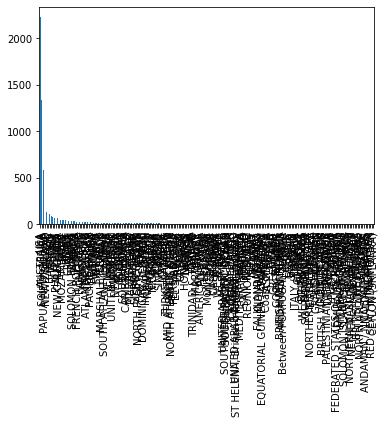

In [269]:
%matplotlib inline
shark_data
shark_data2 = shark_data.copy(deep=True)
#shark_data2["Country"].value_counts(normalize=True)
#shark_data2[~((shark_data2.loc[:,"Country"] == "USA") & (shark_data2.loc[:,"Country"] == "AUSTRALIA") & (shark_data2.loc[:,"Country"] == "SOUTH AFRICA"))] = "OTHER COUNTRIES"
#shark_data2["Country"][~((shark_data2.loc[:,"Country"] == "USA") & (shark_data2.loc[:,"Country"] == "AUSTRALIA") & (shark_data2.loc[:,"Country"] == "SOUTH AFRICA"))] = "OTHER COUNTRIES"
#shark_data2["Country"][((shark_data2.loc[:,"Country"] != "USA") & (shark_data2.loc[:,"Country"] != "AUSTRALIA") & (shark_data2.loc[:,"Country"] != "SOUTH AFRICA"))] = "OTHER COUNTRIES"
#shark_data2["Country"].value_counts().plot(kind="bar"
#shark_data2["Country"][shark_data2.loc[:,"Country"] != "OTHER COUNTRIES"].value_counts().plot(kind="bar")

### Graphic above shows us that we should install our headquarters in USA

---

In [242]:
shark_data3 = shark_data2[shark_data2["Country"] != "OTHER COUNTRIES"]
shark_data3

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,original order
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,6303.0
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,0,6302.0
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,0,6301.0
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,0,2 m shark,6300.0
5,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,0,"No injury, board bitten",N,0,0,6298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,Before 1906,0,Unprovoked,AUSTRALIA,0,0,Fishing,fisherman,M,0,FATAL,Y,0,Blue pointers,8.0
6296,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,0,FATAL,Y,0,Said to involve a grey nurse shark that leapt ...,7.0
6297,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,0,FATAL,Y,0,0,6.0
6298,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,0,Pearl diving,Ahmun,M,0,FATAL,Y,0,0,5.0


<AxesSubplot:>

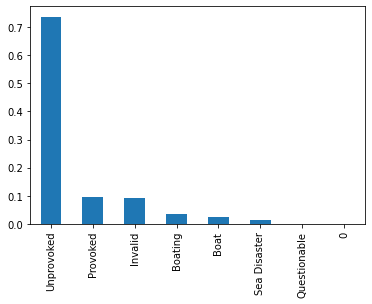

In [260]:
shark_data3["Type"].value_counts(normalize=True).plot(kind="bar")

### Most cases were UNPROVOKED, which makes us conclude that our company should aim at providing informative services other than selling any type of product. Therefore,

In [261]:
shark_data3["Sex "].value_counts()

M      3388
F       451
0       303
M         2
lli       1
N         1
Name: Sex , dtype: int64

<AxesSubplot:xlabel='Year'>

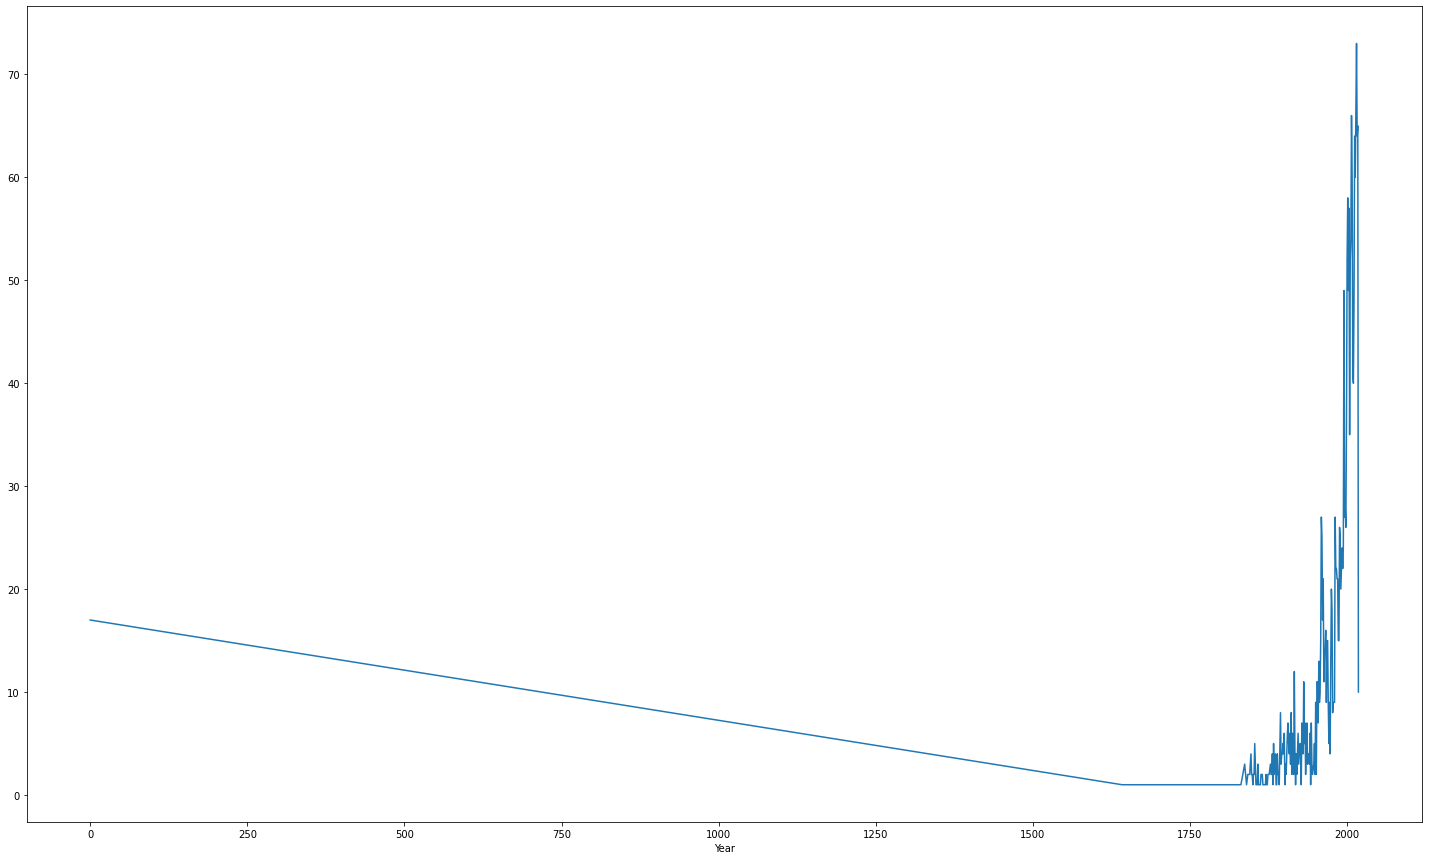

In [274]:
#shark_data3.groupby(["Country"]).count().plot()
shark_data3[(shark_data3.loc[:,"Country"] == "USA")].groupby("Year").count()["Country"].plot(figsize=(25, 15))

In [ ]:
  (shark_data2.loc[:,"Country"] == "AUSTRALIA") &
             (shark_data2.loc[:,"Country"] == "SOUTH AFRICA"))]

In [254]:
usa_fatal = shark_data2[(shark_data2["Country"] == "USA") &
                   (shark_data2["Fatal (Y/N)"] == "Y")]

au_fatal = shark_data2[(shark_data2["Country"] == "AUSTRALIA") &
                   (shark_data2["Fatal (Y/N)"] == "Y")]

sa_fatal = shark_data2[(shark_data2["Country"] == "SOUTH AFRICA") &
                   (shark_data2["Fatal (Y/N)"] == "Y")]

cases_usa = shark_data2["Country"] == "USA"

cases_au = shark_data2["Country"] == "AUSTRALIA"

cases_sa = shark_data2["Country"] == "SOUTH AFRICA"

print(f"USA FATAL CASES: {len(usa_fatal)}")
print(f"AUSTRALIA FATAL CASES: {(len(au_fatal))}")
print(f"SOUTH AFRICA FATAL CASES: {(len(sa_fatal))}")



USA FATAL CASES: 186
AUSTRALIA FATAL CASES: 283
SOUTH AFRICA FATAL CASES: 106
